In [1]:
import os
import json
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from extract_features import moving_window

from sklearn.metrics import davies_bouldin_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import svm

from sklearn.model_selection import cross_val_score

from matplotlib import pyplot as plt

RAND_SEED = 42

In [81]:
wli = 2.6
wii = 0.1
path_to_data = "data/junipersun/"

features_26 = np.load("data/junipersun/FA_data/features_train_3.0_0.1.npy")
features_26.shape

(43, 150, 3)

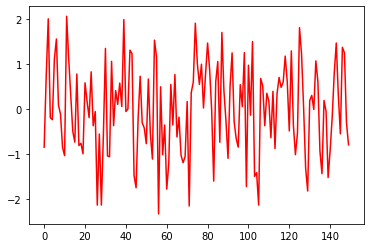

In [82]:
plt.plot(features_26[0, :, 0], 'r-')

<Figure size 432x288 with 0 Axes>

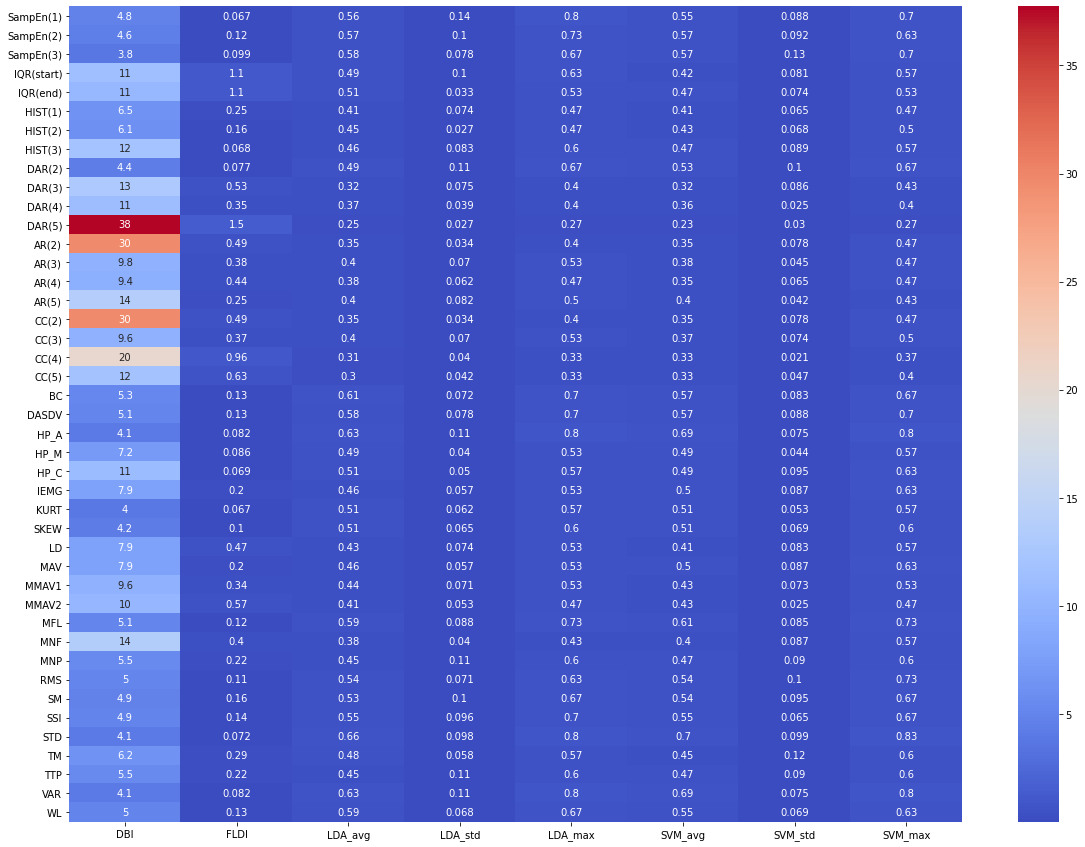

In [69]:
wli
wii
path_to_data = "data/junipersun/"

FA_results = pd.read_csv(os.path.join(path_to_data, "FA_results/feature_analysis_{}_{}.csv".format(round(wli, 2), round(wii, 2))), header=0, index_col=0)

plt.figure()
plt.subplots(figsize=(20,15))
sns.heatmap(FA_results, annot=True, cmap='coolwarm')
plt.show()

In [48]:
wli = 3.0
wii = 0.1
path_to_data = "data/junipersun/"

# load meta data
with open(os.path.join(path_to_data, "info.txt")) as json_file:
    meta_info = json.load(json_file)

# load gestures labels, subject labels
y_g = np.load(os.path.join(path_to_data, "split/y_g_train.npy"))

# load features
features = np.load(os.path.join(
    path_to_data, "FA_data/features_train_{}_{}.npy".format(round(wli, 2), round(wii, 2))))

# load feature labels
with open(os.path.join(path_to_data, "FA_data/feature_labels_train_{}_{}.txt".format(round(wli, 2), round(wii, 2))), 'r') as f:
    feature_labels = [line.rstrip('\n') for line in f]
print(feature_labels)

features = np.nan_to_num(features)

# format gesture labels
n_windows = features.shape[1] / y_g.shape[0]
y_g_w = np.repeat(y_g, n_windows)

['SampEn(1)', 'SampEn(2)', 'SampEn(3)', 'IQR(start)', 'IQR(end)', 'HIST(1)', 'HIST(2)', 'HIST(3)', 'DAR(2)', 'DAR(3)', 'DAR(4)', 'DAR(5)', 'AR(2)', 'AR(3)', 'AR(4)', 'AR(5)', 'CC(2)', 'CC(3)', 'CC(4)', 'CC(5)', 'BC', 'DASDV', 'HP_A', 'HP_M', 'HP_C', 'IEMG', 'KURT', 'SKEW', 'LD', 'MAV', 'MMAV1', 'MMAV2', 'MFL', 'MNF', 'MNP', 'RMS', 'SM', 'SSI', 'STD', 'TM', 'TTP', 'VAR', 'WL']


In [49]:
c = 0 # channel
features_c = np.squeeze(features[:, :, c]).T
print("features_c.shape", features_c.shape)
df_features_c = pd.DataFrame(features_c, columns=feature_labels)
df_features_c.loc[:, 'gesture'] = y_g_w
df_features_c = df_features_c.sort_values(by='gesture')

features_c.shape (150, 43)


<Figure size 432x288 with 0 Axes>

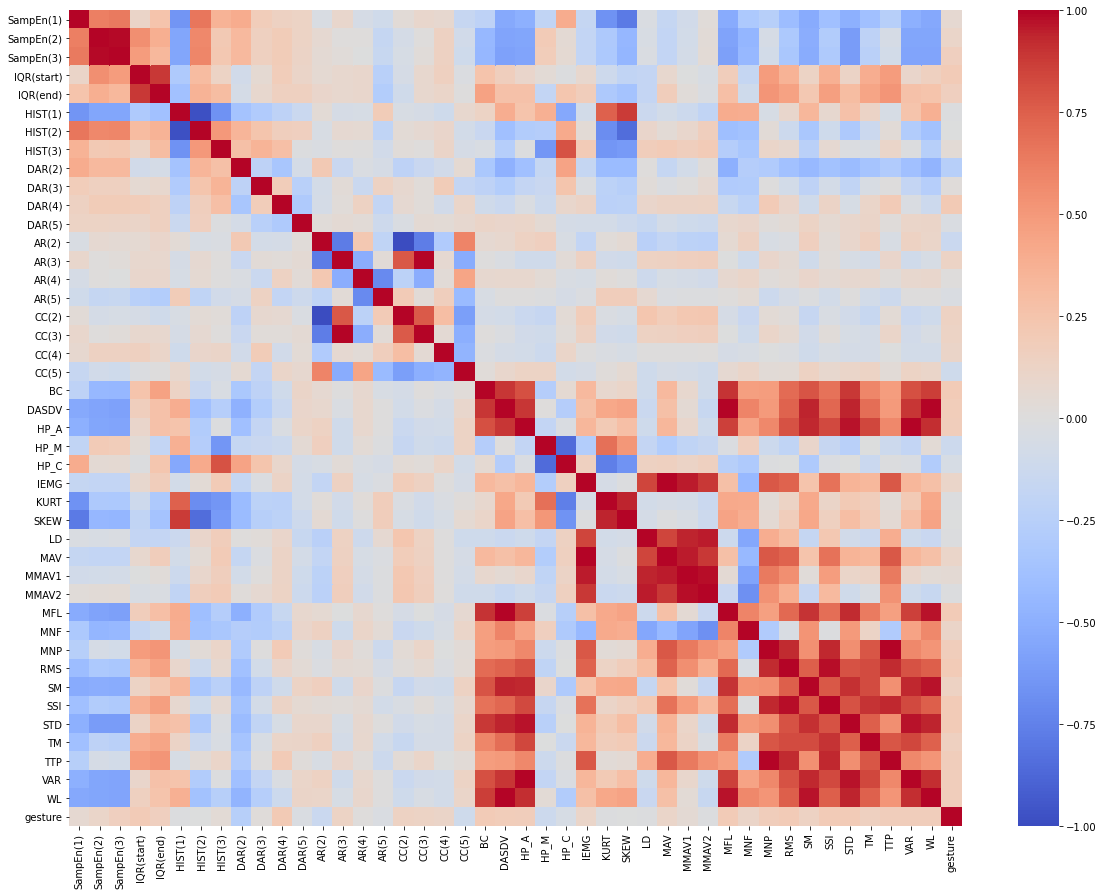

In [70]:
plt.figure()
plt.subplots(figsize=(20,15))
sns.heatmap(df_features_c.corr(), annot=False, cmap='coolwarm')
plt.show()

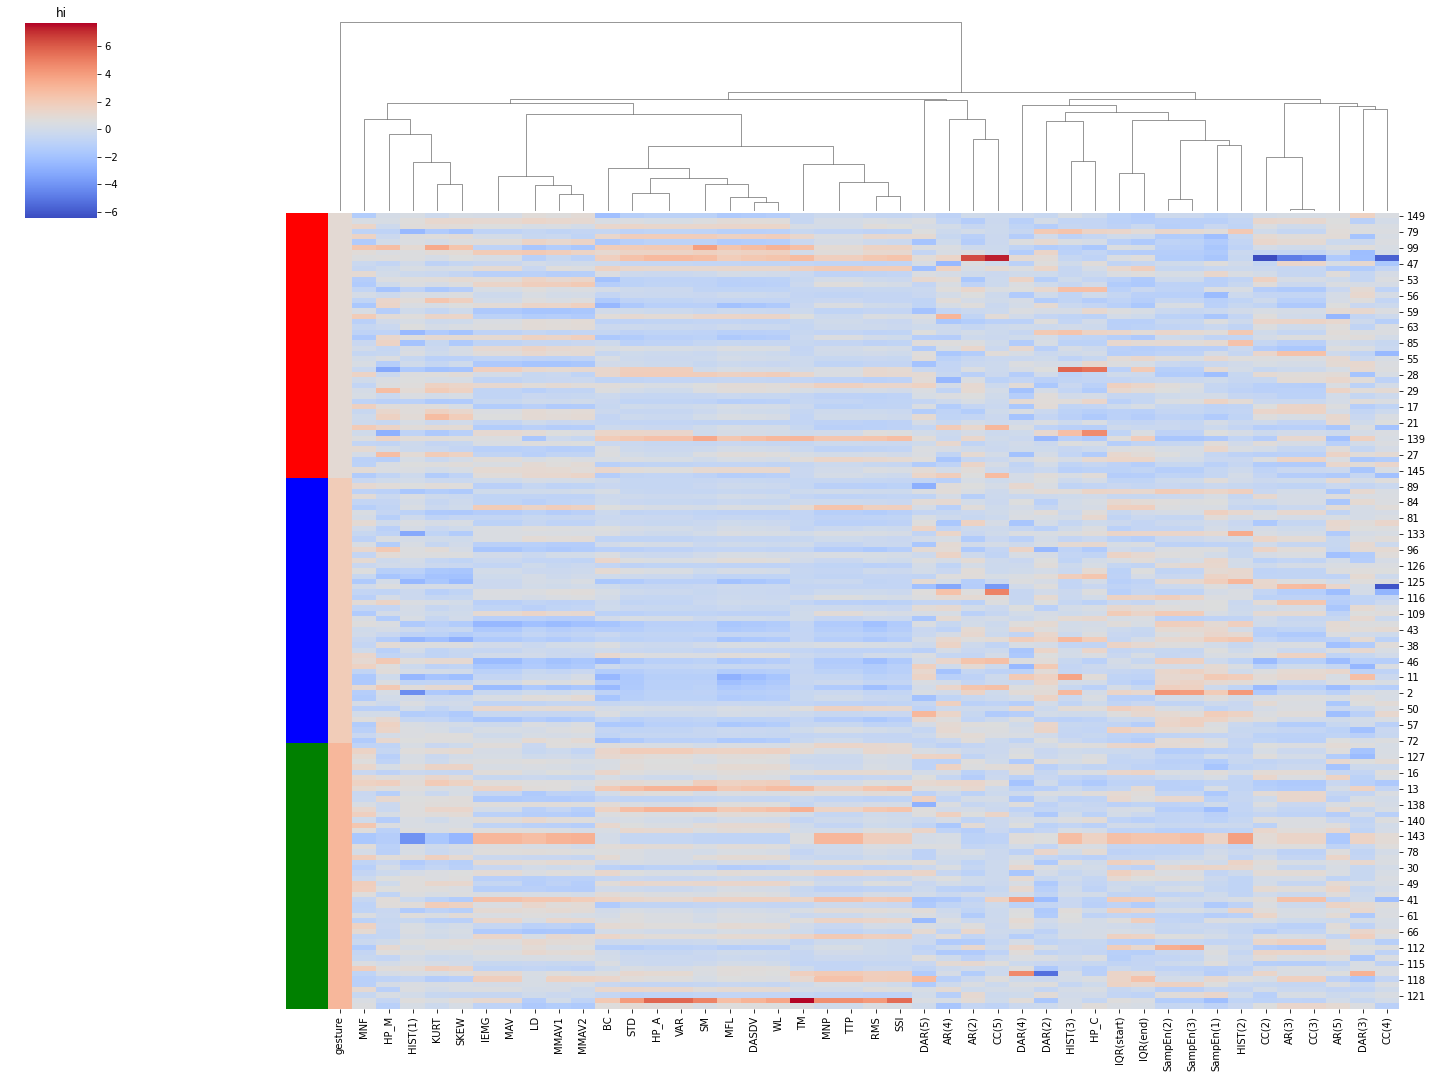

In [71]:
lut = dict(zip([1, 2, 3], "rbg"))
row_colors = [lut[y] for y in df_features_c['gesture']]

sns.clustermap(df_features_c, row_cluster=False, cmap='coolwarm', row_colors=row_colors, figsize=(20, 15))
plt.show()

RMS


<AxesSubplot:title={'center':'RMS'}, xlabel='ch0', ylabel='ch1'>

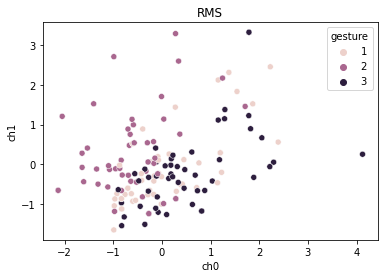

In [63]:
f = 35
print(feature_labels[f])
single_df = pd.DataFrame(features[f, :, :], columns=['ch0', 'ch1', 'ch2'])
single_df.loc[:, 'gesture'] = y_g_w

plt.figure()
plt.title(feature_labels[f])
# plt.subplots(figsize=(20,15))
sns.scatterplot(data=single_df, x="ch0", y="ch1", hue='gesture')